In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
%matplotlib inline

In [2]:
#Read data to DataFrame
df = pd.read_json('D:/Users/Alex/Documents/currencies_old.json')

In [3]:
#Let's get a sense of the data
df.head()

,date,day_close,day_high,day_low,day_market_cap,day_open,day_volume,market_rank,short_name
0,2019-04-01,4158.18,4164.95,4096.90,"73,269,368,747",4105.36,"10,157,794,171",#1,(BTC)
1,2019-03-31,4105.40,4113.02,4094.10,"72,339,379,036",4105.46,"9,045,122,443",#1,(BTC)
2,2019-03-30,4106.66,4296.81,4053.91,"72,355,190,645",4092.14,"9,732,688,060",#1,(BTC)
3,2019-03-29,4098.37,4113.50,4034.10,"72,202,088,875",4068.30,"10,918,665,557",#1,(BTC)
4,2019-03-28,4069.11,4094.90,4040.27,"71,678,998,915",4087.58,"9,353,915,899",#1,(BTC)


In [4]:
#DataFrame structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 9 columns):
date              1380 non-null datetime64[ns]
day_close         1380 non-null float64
day_high          1380 non-null float64
day_low           1380 non-null float64
day_market_cap    1380 non-null object
day_open          1380 non-null float64
day_volume        1380 non-null object
market_rank       1380 non-null object
short_name        1380 non-null object
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 97.1+ KB


In [6]:
#Clean market rank variable
#df['market_rank'] = (
#df['market_rank']
#    .str.replace('#','')
#    .astype(int)
#)

#Clean short name variable
df['short_name'] = (
df['short_name']
    .str.replace('(','')
    .str.replace(')','')
)

#Clean day close variable
#df['day_close'] =  (
#df['day_close']
#    .str.replace(',','')
#    .astype(float)
#)
#Check results
df.head()

,date,day_close,day_high,day_low,day_market_cap,day_open,day_volume,market_rank,short_name
0,2019-04-01,4158.18,4164.95,4096.90,"73,269,368,747",4105.36,"10,157,794,171",1,BTC
1,2019-03-31,4105.40,4113.02,4094.10,"72,339,379,036",4105.46,"9,045,122,443",1,BTC
2,2019-03-30,4106.66,4296.81,4053.91,"72,355,190,645",4092.14,"9,732,688,060",1,BTC
3,2019-03-29,4098.37,4113.50,4034.10,"72,202,088,875",4068.30,"10,918,665,557",1,BTC
4,2019-03-28,4069.11,4094.90,4040.27,"71,678,998,915",4087.58,"9,353,915,899",1,BTC


In [7]:
#Sort DataFrame
df.sort_values(['market_rank', 'date'], ascending = [True, True], inplace = True)
df.head()

,date,day_close,day_high,day_low,day_market_cap,day_open,day_volume,market_rank,short_name
29,2019-03-03,3847.18,3875.48,3836.91,"67,592,376,373",3862.27,"7,253,558,152",1,BTC
28,2019-03-04,3761.56,3867.38,3733.75,"66,094,551,587",3845.09,"9,029,175,788",1,BTC
27,2019-03-05,3896.38,3903.92,3745.18,"68,470,655,400",3759.83,"10,174,126,415",1,BTC
26,2019-03-06,3903.94,3919.51,3871.46,"68,609,885,776",3897.08,"9,175,291,529",1,BTC
25,2019-03-07,3911.48,3939.37,3894.11,"68,749,421,311",3903.38,"9,584,165,519",1,BTC


In [8]:
#Create Bitcoin and Ethereum series'
BTC = (
df
    .loc[df['short_name'] == 'BTC']
    .set_index('date')
    .loc[:,'day_close']
)
ETH = (
df
    .loc[df['short_name'] == 'ETH']
    .set_index('date')
    .loc[:,'day_close']
)
print(BTC.head())
print(ETH.head())

date
2019-03-03    3847.18
2019-03-04    3761.56
2019-03-05    3896.38
2019-03-06    3903.94
2019-03-07    3911.48
Name: day_close, dtype: float64
date
2019-03-03    132.25
2019-03-04    127.77
2019-03-05    137.82
2019-03-06    138.79
2019-03-07    138.03
Name: day_close, dtype: float64


In [9]:
#First order autogregression model at day level
BTC_day_model = ARMA(BTC, order = (1,0))
BTC_day_results = BTC_day_model.fit()
print(BTC_day_results.summary())

                              ARMA Model Results                              
Dep. Variable:              day_close   No. Observations:                   30
Model:                     ARMA(1, 0)   Log Likelihood                -158.842
Method:                       css-mle   S.D. of innovations             46.894
Date:                Sun, 14 Apr 2019   AIC                            323.683
Time:                        20:30:08   BIC                            327.887
Sample:                    03-03-2019   HQIC                           325.028
                         - 04-01-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3994.6424     68.496     58.319      0.000    3860.393    4128.892
ar.L1.day_close     0.9014      0.085     10.603      0.000       0.735       1.068
                                

D:\Users\Alex\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Users\Alex\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


D:\Users\Alex\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


AttributeError: module 'matplotlib' has no attribute 'show'

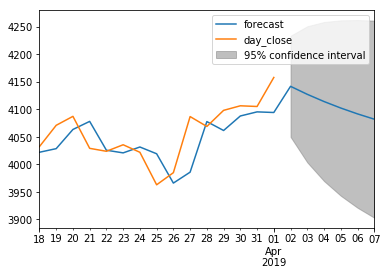

In [10]:
#Forcast Bitcoin at day level
len(BTC)
BTC_day_results.plot_predict(start = 15, end = 35)
plt.show()

In [ ]:
#Autoregress Bitcoin at week level

In [ ]:
#Autoregress Bitcoin at month level

In [ ]:
#